<a href="https://colab.research.google.com/github/kratiagrawal100/SMAI_Team_30/blob/main/unsupervised_domain_adaptation_MNIST_SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import math

import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_dataset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=torchvision.transforms.ToTensor())

100%|██████████| 182040794/182040794 [00:07<00:00, 23324130.07it/s]


100%|██████████| 64275384/64275384 [00:05<00:00, 12119700.11it/s]


In [3]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


torch.Size([3, 32, 32])


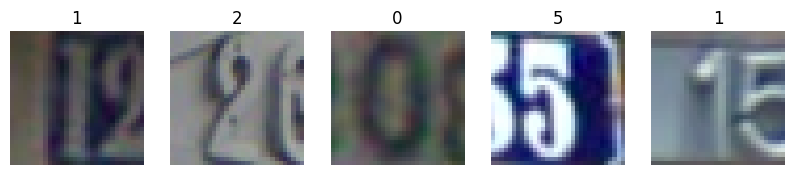

In [27]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)
print(images[0].shape)
plt.figure(figsize=(10, 7))

for i in range(5):
  ax = plt.subplot(1, 5, i + 1)
  ax.axis('off')
  img = images[i].permute(1, 2, 0)
  plt.imshow(img)
  plt.title(labels[i].numpy())

In [28]:
mnist_pixels = torchvision.datasets.MNIST('.', train=True, download=True).data / 255
mean = mnist_pixels.mean().item()
std = mnist_pixels.std().item()

print(f"Mean {mean} and Std {std}")
mean = torch.tensor([mean, mean, mean])
std = torch.tensor([std, std, std])
transform = transforms.Compose([
  transforms.ToTensor(),
  lambda x: x.repeat(3, 1, 1) if x.shape[0] == 1 else x,
  transforms.Normalize(mean, std)
])

mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform)
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [50000, 10000])
mnist_test = torchvision.datasets.MNIST('.', train=False, transform=transform)

source_train_loader = DataLoader(mnist_train, batch_size=128)
source_test_loader = DataLoader(mnist_test, batch_size=128)

100%|██████████| 9912422/9912422 [00:00<00:00, 94814777.95it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19112605.53it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26966850.05it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12941935.30it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Mean 0.13066047430038452 and Std 0.30810782313346863
